1. Importing necessary libraries and loading the Dataset

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv('datasetInterview.csv')

df.head()

,READING_ID,PARAMETER,IDX,PARAM_VALUE
0,0,DRIVE_SPEED,0,7.40
1,0,FUEL_EFF,0,3.76
2,0,GCW,1,0.00
3,0,GCW,2,0.00
4,0,GCW,3,1.32


2. In order to analyze the multidimensional Speed and Gross Combination Weight parameters, I have chosen to take the maximum value from it´s partitions 

In [229]:
groupby_data = df.groupby(['READING_ID', 'PARAMETER'])['PARAM_VALUE'].max()

print(groupby_data)

READING_ID  PARAMETER  
0           DRIVE_SPEED     7.40
            FUEL_EFF        3.76
            GCW            18.19
            SLOPE_1         7.66
            SLOPE_2         3.81
                           ...  
1136807896  GCW            23.93
            SLOPE_1         8.04
            SLOPE_2         3.11
            SLOPE_3         0.43
            SPEED          26.61
Name: PARAM_VALUE, Length: 139978, dtype: float64


3. Switched Parameters to become column headers

In [230]:
reshaped_data = groupby_data.unstack('PARAMETER')

print(reshaped_data)

PARAMETER   DRIVE_SPEED  FUEL_EFF    GCW  SLOPE_1  SLOPE_2  SLOPE_3  SPEED
READING_ID                                                                
0                  7.40      3.76  18.19     7.66     3.81     0.37  23.36
210970             5.22      4.96  24.62     9.07     1.54     0.11  22.64
2329111            7.28      3.91  20.24     7.13     4.62     0.54  18.60
3040660            5.83      2.89  32.46     6.91     4.92     0.67  19.40
4936916            7.60      4.33  18.34     7.81     3.63     0.30  16.55
...                 ...       ...    ...      ...      ...      ...    ...
1136797671         7.32      5.55  36.29     9.98     0.04     0.00  54.59
1136798047         5.07      3.05  51.39     8.37     2.61     0.31  17.96
1136801478         3.82      2.54  33.97     5.03     6.89     2.19  17.00
1136803392         2.79      2.28  31.24     7.57     3.93     0.39  20.33
1136807896         6.41      3.40  23.93     8.04     3.11     0.43  26.61

[20000 rows x 7 columns]

4. Data clean up

In [231]:
##Checking for null values
null_counts = reshaped_data.isnull().sum()

print(null_counts)

PARAMETER
DRIVE_SPEED     0
FUEL_EFF       22
GCW             0
SLOPE_1         0
SLOPE_2         0
SLOPE_3         0
SPEED           0
dtype: int64


5. Select rows with Null or 0 values to better understant their context

In [232]:
NaN_Rows = reshaped_data[(reshaped_data['FUEL_EFF'].isnull()) | (reshaped_data['FUEL_EFF'] == 0)]


print(NaN_Rows)

PARAMETER   DRIVE_SPEED  FUEL_EFF    GCW  SLOPE_1  SLOPE_2  SLOPE_3  SPEED
READING_ID                                                                
51478278           7.21       NaN  21.23     7.03     4.73     0.63  19.62
65683455           6.64       NaN  36.10     8.32     2.81     0.19  15.71
73266901           6.77       NaN  34.05     6.76     5.23     0.58  13.50
139812656          6.60       NaN  32.50     8.02     3.23     0.33  18.16
188442019          7.35       NaN  26.14     7.10     4.59     0.63  15.83
226737411          6.89       NaN  36.70     7.38     4.08     0.63  13.54
229429608          7.78       NaN  30.50     9.11     1.49     0.11  18.10
259915194          7.59       NaN  44.88     8.27     2.68     0.46  39.10
263381158          7.45       NaN  51.86     8.57     2.29     0.26  20.27
268098820          6.78       NaN  32.93     7.93     3.38     0.34  21.38
270626461          7.59       NaN  32.53     6.70     4.67     1.39  17.84
382737284          7.53  

6. Check if FUEL_EFF has simetrical data in order to decide how to proceed with the clean up

In [233]:
## Calculates the skewness of FUEL_EFF 
## If the skweness is close to 0, we can replace it with the mean value 

fuel_eff_skewness = reshaped_data['FUEL_EFF'].skew()

print("Skewness of FUEL_EFF:", fuel_eff_skewness)

Skewness of FUEL_EFF: 0.140301697883056


7. Dealing with NaN and 0 Values

In [234]:
## Replace null values with the mean of FUEL_EFF
## Drop rows where FUEL_EFF is 0

fuel_eff_mean = reshaped_data['FUEL_EFF'].mean()

reshaped_data['FUEL_EFF'].fillna(fuel_eff_mean, inplace=True)


reshaped_data = reshaped_data[reshaped_data['FUEL_EFF'] != 0]


print(reshaped_data)



PARAMETER   DRIVE_SPEED  FUEL_EFF    GCW  SLOPE_1  SLOPE_2  SLOPE_3  SPEED
READING_ID                                                                
0                  7.40      3.76  18.19     7.66     3.81     0.37  23.36
210970             5.22      4.96  24.62     9.07     1.54     0.11  22.64
2329111            7.28      3.91  20.24     7.13     4.62     0.54  18.60
3040660            5.83      2.89  32.46     6.91     4.92     0.67  19.40
4936916            7.60      4.33  18.34     7.81     3.63     0.30  16.55
...                 ...       ...    ...      ...      ...      ...    ...
1136797671         7.32      5.55  36.29     9.98     0.04     0.00  54.59
1136798047         5.07      3.05  51.39     8.37     2.61     0.31  17.96
1136801478         3.82      2.54  33.97     5.03     6.89     2.19  17.00
1136803392         2.79      2.28  31.24     7.57     3.93     0.39  20.33
1136807896         6.41      3.40  23.93     8.04     3.11     0.43  26.61

[19999 rows x 7 columns]

8. Use Scatter Plot to analyze each parameter behaviour compared to the target variable

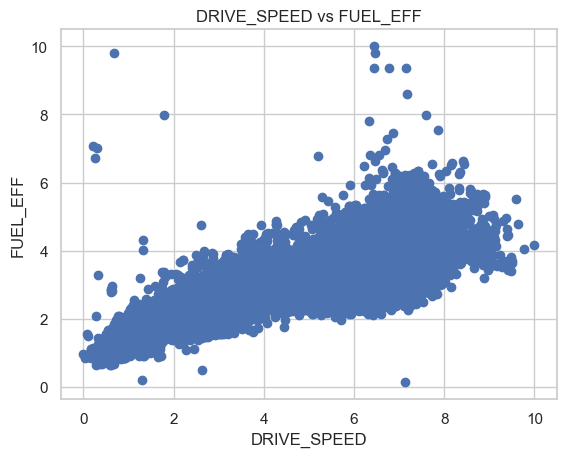

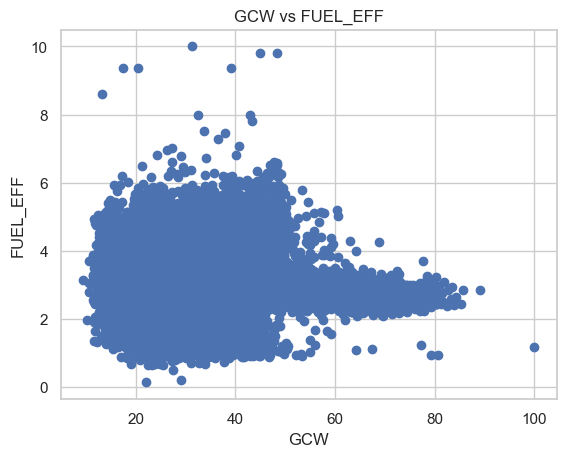

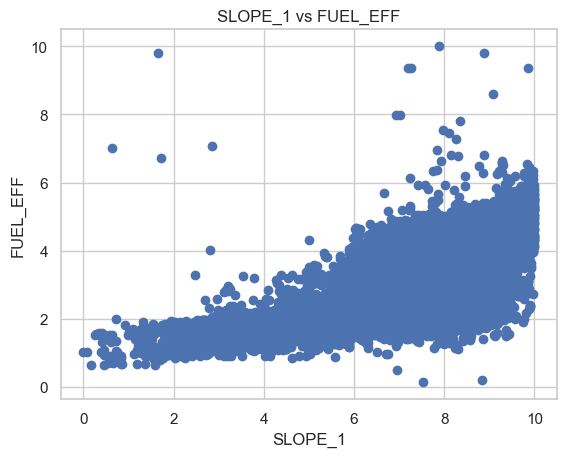

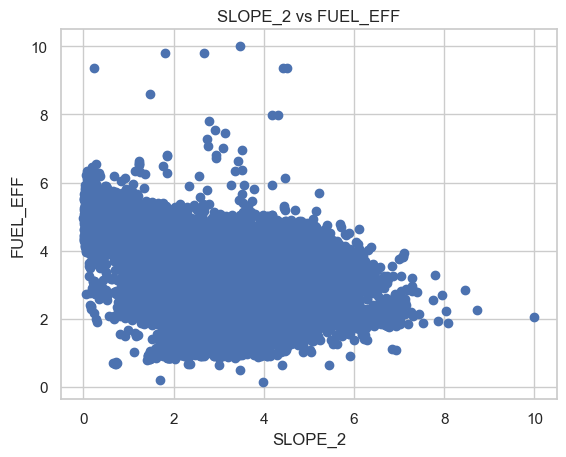

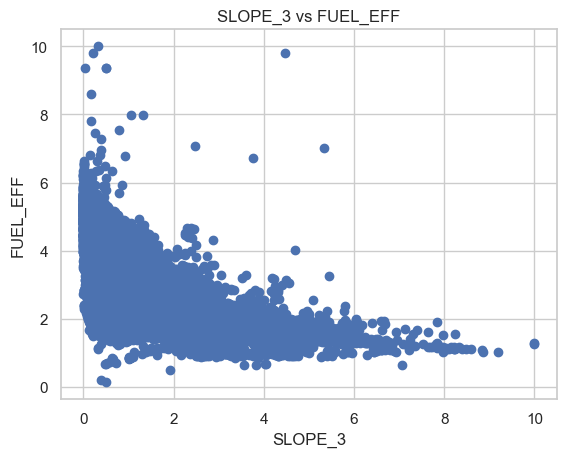

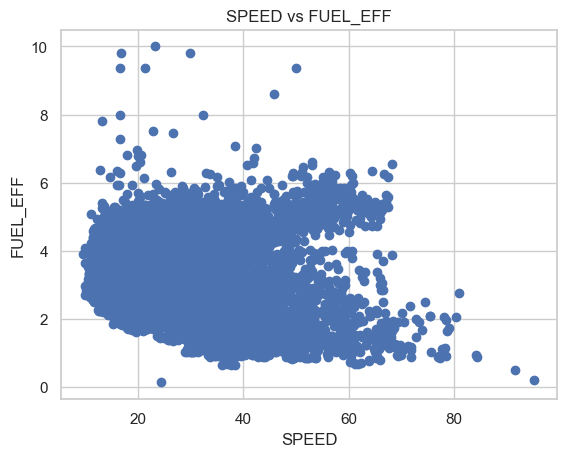

In [235]:
## Selecting the variable columns (no reading/index column)
data = reshaped_data[['DRIVE_SPEED', 'GCW', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3', 'SPEED', 'FUEL_EFF']]

for column in data.columns[:-1]:
    plt.scatter(data[column], data['FUEL_EFF'])
    plt.xlabel(column)
    plt.ylabel('FUEL_EFF')
    plt.title(f'{column} vs FUEL_EFF')
    plt.show()

 (EXTRA) Created scatter plots on the ideal sample size to check the distribution behaviour

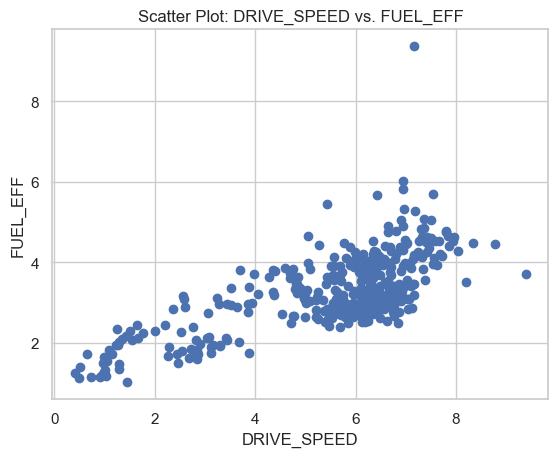

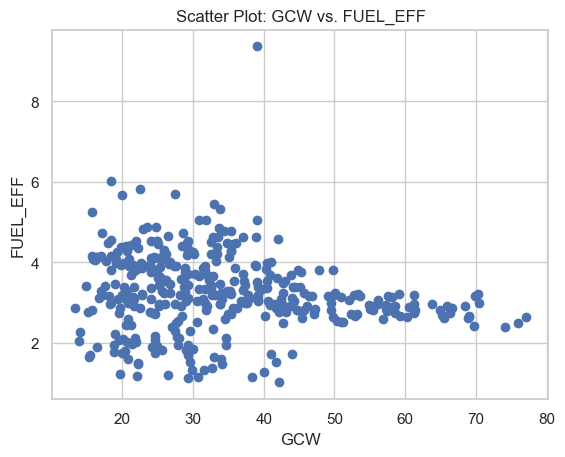

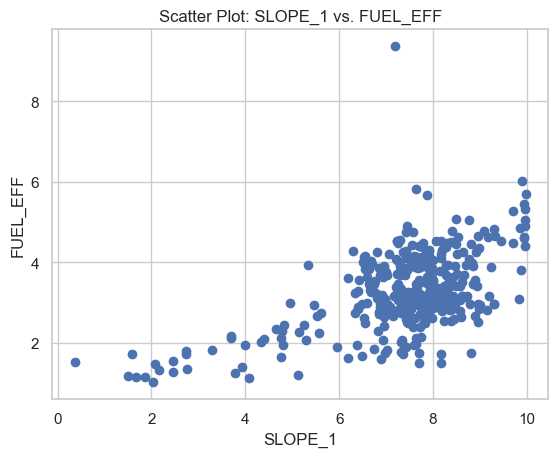

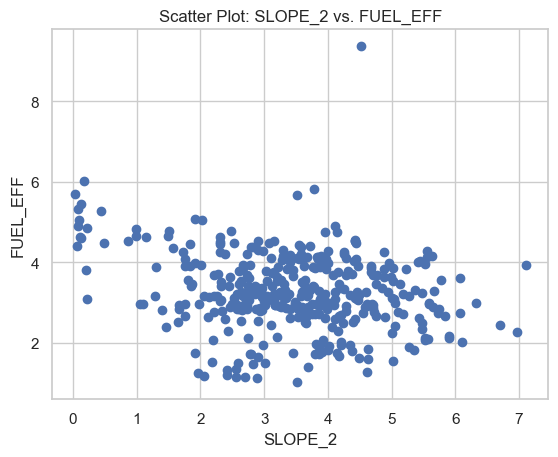

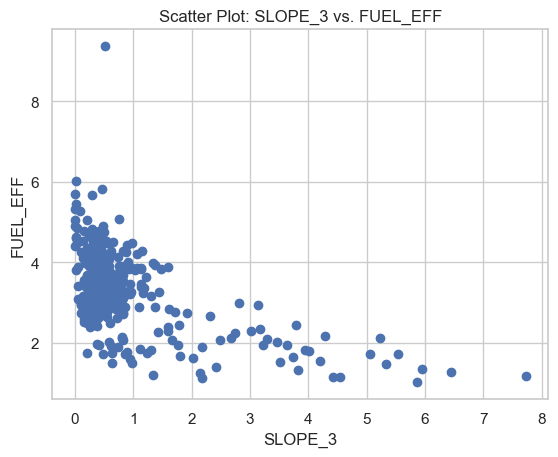

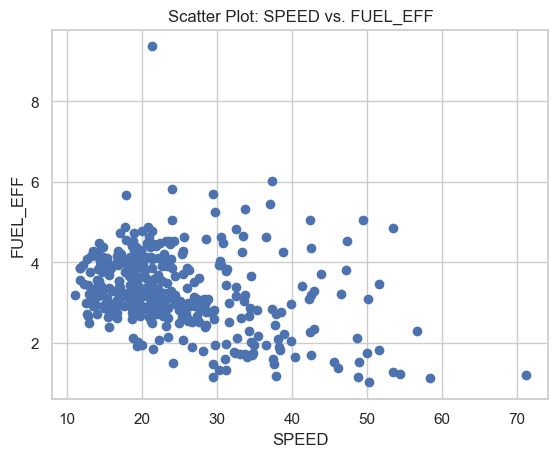

In [236]:
import random


sample_data = data.sample(n=384, random_state=42)  


columns = ["DRIVE_SPEED", "GCW", "SLOPE_1", "SLOPE_2", "SLOPE_3", "SPEED"]

for column in columns:
    plt.scatter(sample_data[column], sample_data["FUEL_EFF"])
    plt.xlabel(column)
    plt.ylabel("FUEL_EFF")
    plt.title(f"Scatter Plot: {column} vs. FUEL_EFF")
    plt.show()

9. We can check the R² value to understant how the linear regression model would represent all variables

In [237]:
# Iterate over each independent variable and check linearity with fuel consumption
for column in data.columns[:-1]:
    slope, intercept, r_value, p_value, std_err = linregress(data[column], data['FUEL_EFF'])
    
    # Print the results
    print(f"Parameter: {column}")
    print(f"Linearity (R²): {r_value**2}")
    print(f"P-value: {p_value}\n")

Parameter: DRIVE_SPEED
Linearity (R²): 0.5223034048946362
P-value: 0.0

Parameter: GCW
Linearity (R²): 0.03263260152333492
P-value: 2.6919561651353387e-146

Parameter: SLOPE_1
Linearity (R²): 0.32255504111101235
P-value: 0.0

Parameter: SLOPE_2
Linearity (R²): 0.08691732848078057
P-value: 0.0

Parameter: SLOPE_3
Linearity (R²): 0.24940145689648335
P-value: 0.0

Parameter: SPEED
Linearity (R²): 0.04865658138687036
P-value: 6.503283258656625e-219



(EXTRA) -> Correlation Matrix Heatmap

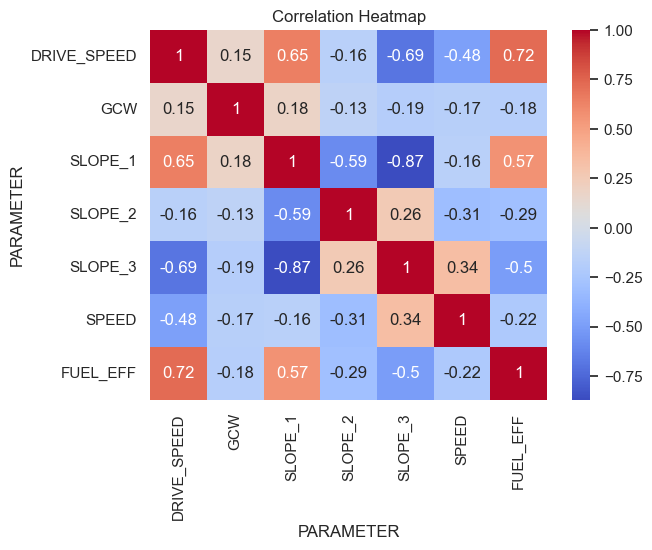

In [238]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

##With this matrix, we are analyzing INDIVIDUAL correlation to the independent values.

10. We can check the linear regression coeficients between our independent and our target value

In [239]:
X = reshaped_data[['DRIVE_SPEED', 'GCW', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3', 'SPEED']]

y = reshaped_data['FUEL_EFF']

model = LinearRegression()

model.fit(X, y)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


       Feature  Coefficient
0  DRIVE_SPEED     0.382665
1          GCW    -0.020440
2      SLOPE_1     0.167007
3      SLOPE_2    -0.079558
4      SLOPE_3     0.171783
5        SPEED     0.001973


11. Test non-linear regression option (Polynomial Regression)

In [240]:
X = data[['DRIVE_SPEED', 'GCW', 'SLOPE_1', 'SLOPE_2', 'SLOPE_3', 'SPEED']]
y = data['FUEL_EFF']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2  # I selected 2 degrees, selecting a greater degree will make the model better, but more prone to OVERFITTING
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training R²:", train_r2)
print("Testing R²:", test_r2)


Training R²: 0.7160580922841295
Testing R²: 0.7156424754400275


12. Since R² score is closer to 1, we can assume the Polynomial Regression is a more suitable model. For better interpretability, I added an individual IV-DV analysis per cell

Polynomial Regression Results:
R-squared: 0.5254158240608244
Intercept: 1.3689038362038688
Coefficients: [0.         0.25052186 0.01425805]


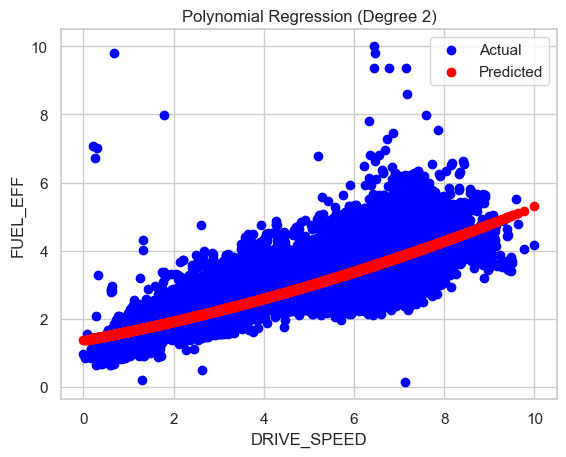

In [241]:
X = data["DRIVE_SPEED"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

## Perform polynomial feature transformation and Fit the polynomial regression model

degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

## Create statistics
r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Results:")
print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

## Create scatter plot
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X_poly), color='red', label='Predicted')
plt.xlabel("DRIVE_SPEED")
plt.ylabel("FUEL_EFF")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()

Polynomial Regression Results:
R-squared: 0.1297798145191057
Intercept: 4.612202226719526
Coefficients: [ 0.         -0.69916542  0.07803936]


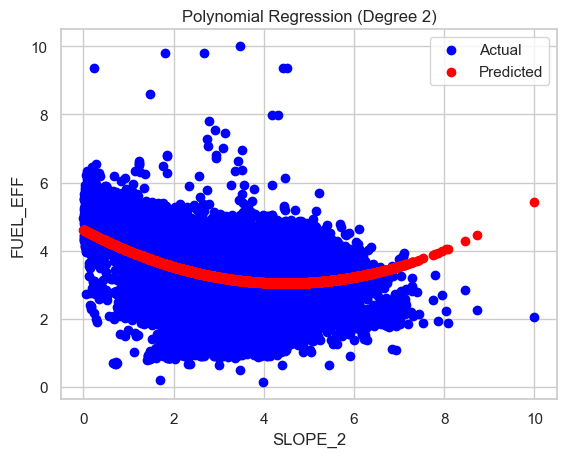

In [242]:
X = data["SLOPE_2"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values


degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)


model = LinearRegression()
model.fit(X_poly, y)


r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Results:")
print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X_poly), color='red', label='Predicted')
plt.xlabel("SLOPE_2")
plt.ylabel("FUEL_EFF")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()

Polynomial Regression Results:
R-squared: 0.3253002262679875
Intercept: 0.9237749925420107
Coefficients: [0.         0.21353905 0.01237431]


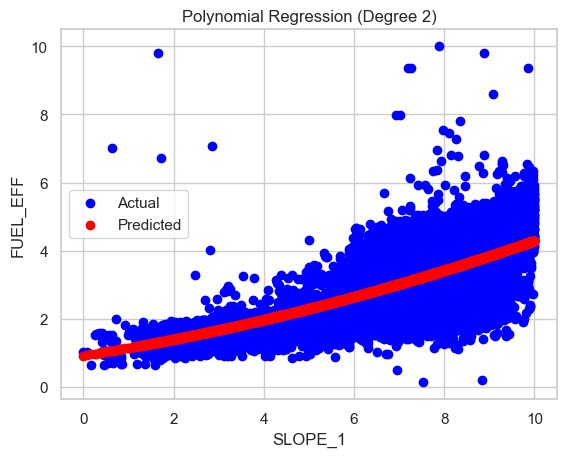

In [243]:
X = data["SLOPE_1"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values


degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)


model = LinearRegression()
model.fit(X_poly, y)


r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Results:")
print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X_poly), color='red', label='Predicted')
plt.xlabel("SLOPE_1")
plt.ylabel("FUEL_EFF")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()

Polynomial Regression Results:
R-squared: 0.2654744764355007
Intercept: 3.7231798509605705
Coefficients: [ 0.         -0.72580805  0.05487661]


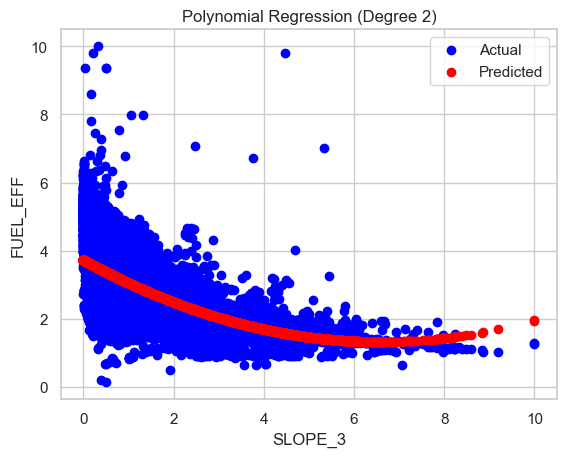

In [244]:
X = data["SLOPE_3"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Results:")
print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X_poly), color='red', label='Predicted')
plt.xlabel("SLOPE_3")
plt.ylabel("FUEL_EFF")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()

Polynomial Regression Results:
R-squared: 0.05035554420206545
Intercept: 3.9701384573918137
Coefficients: [ 0.         -0.03456855  0.0002265 ]


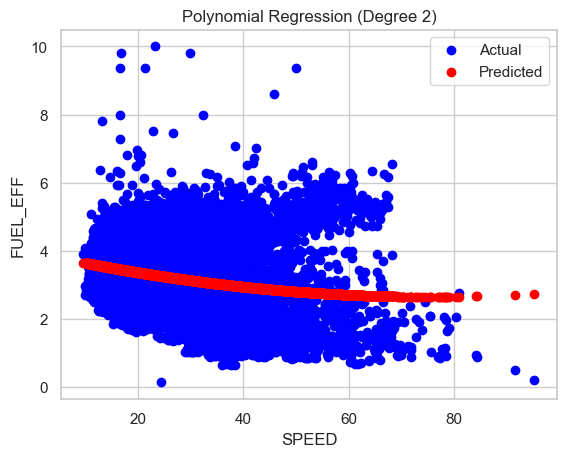

In [245]:
X = data["SPEED"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Results:")
print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X_poly), color='red', label='Predicted')
plt.xlabel("SPEED")
plt.ylabel("FUEL_EFF")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()

13. Since R² score is closer to 1, we can assume the Polynomial Regression is a more suitable model. First we can make individual IV-DV analysis

Polynomial Regression Results:
R-squared: 0.038804934594122154
Intercept: 3.2553231153924433
Coefficients: [ 0.          0.01326763 -0.00030231]


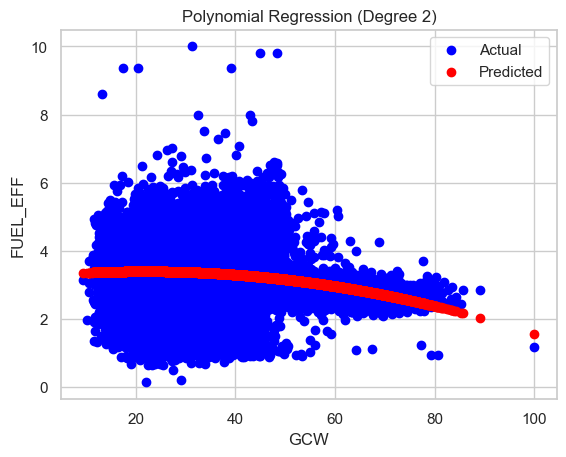

In [246]:
X = data["GCW"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

r_squared = model.score(X_poly, y)
coefficients = model.coef_
intercept = model.intercept_

print("Polynomial Regression Results:")
print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X_poly), color='red', label='Predicted')
plt.xlabel("GCW")
plt.ylabel("FUEL_EFF")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()

14. Random Forrest Regression Model



Random Forest Regression Results:
R-squared: 0.5818242120175381


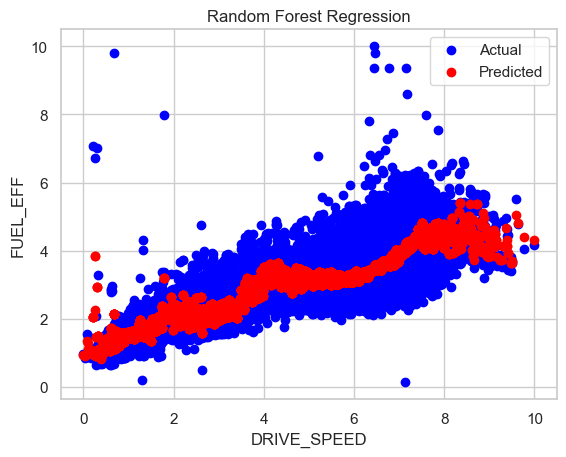

In [247]:
from sklearn.ensemble import RandomForestRegressor

X = data["DRIVE_SPEED"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

## Makes a random forest regression model and fits the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

## Creates performance statistics
r_squared = model.score(X, y)

print("Random Forest Regression Results:")
print(f"R-squared: {r_squared}")

## Creates scatter plot
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X), color='red', label='Predicted')
plt.xlabel("DRIVE_SPEED")
plt.ylabel("FUEL_EFF")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

Random Forest Regression Results:
R-squared: 0.4141996345325335


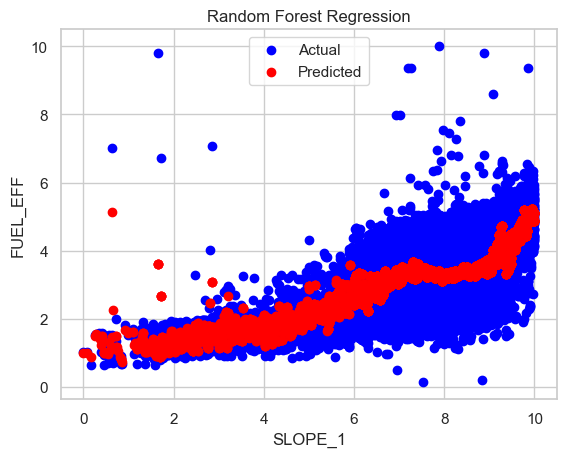

In [248]:
from sklearn.ensemble import RandomForestRegressor

X = data["SLOPE_1"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

r_squared = model.score(X, y)

print("Random Forest Regression Results:")
print(f"R-squared: {r_squared}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X), color='red', label='Predicted')
plt.xlabel("SLOPE_1")
plt.ylabel("FUEL_EFF")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

Random Forest Regression Results:
R-squared: 0.20805669101308855


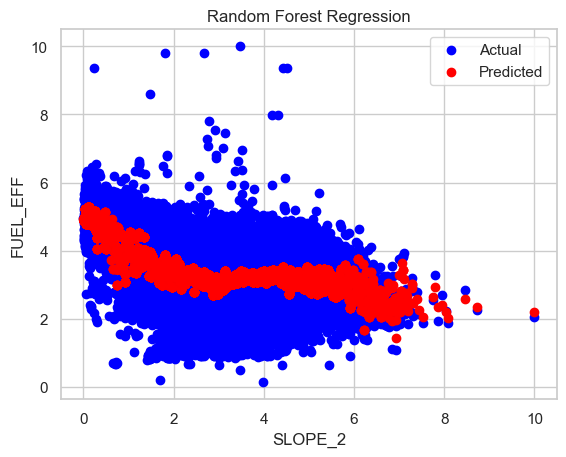

In [249]:
from sklearn.ensemble import RandomForestRegressor

X = data["SLOPE_2"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

r_squared = model.score(X, y)

print("Random Forest Regression Results:")
print(f"R-squared: {r_squared}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X), color='red', label='Predicted')
plt.xlabel("SLOPE_2")
plt.ylabel("FUEL_EFF")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

Random Forest Regression Results:
R-squared: 0.39696761908230604


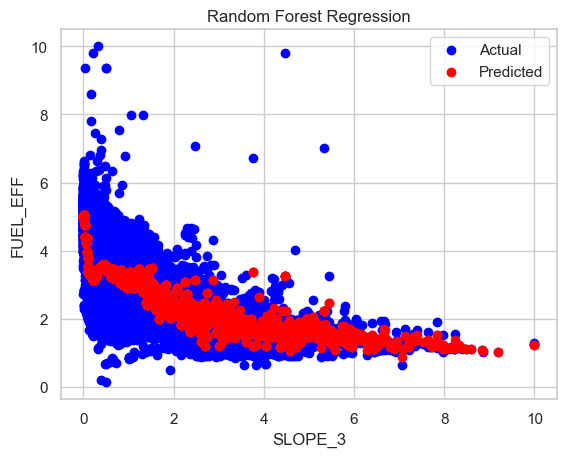

In [250]:
from sklearn.ensemble import RandomForestRegressor

X = data["SLOPE_3"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

r_squared = model.score(X, y)

print("Random Forest Regression Results:")
print(f"R-squared: {r_squared}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X), color='red', label='Predicted')
plt.xlabel("SLOPE_3")
plt.ylabel("FUEL_EFF")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

Random Forest Regression Results:
R-squared: 0.2531916184679902


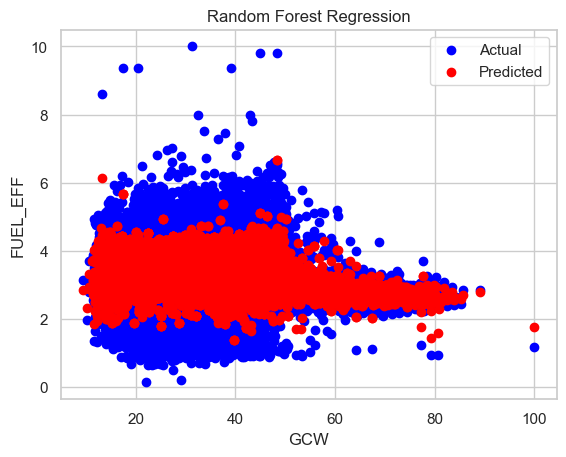

In [251]:
from sklearn.ensemble import RandomForestRegressor

X = data["GCW"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

r_squared = model.score(X, y)

print("Random Forest Regression Results:")
print(f"R-squared: {r_squared}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X), color='red', label='Predicted')
plt.xlabel("GCW")
plt.ylabel("FUEL_EFF")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

Random Forest Regression Results:
R-squared: 0.35974546637656357


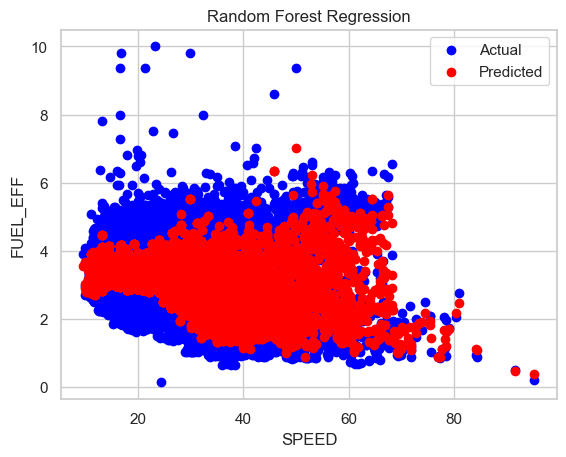

In [252]:
from sklearn.ensemble import RandomForestRegressor

X = data["SPEED"].values.reshape(-1, 1)
y = data["FUEL_EFF"].values

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

r_squared = model.score(X, y)

print("Random Forest Regression Results:")
print(f"R-squared: {r_squared}")

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, model.predict(X), color='red', label='Predicted')
plt.xlabel("SPEED")
plt.ylabel("FUEL_EFF")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

(Extra) Multiple linear regression test

R-squared score: 0.04164143035394974


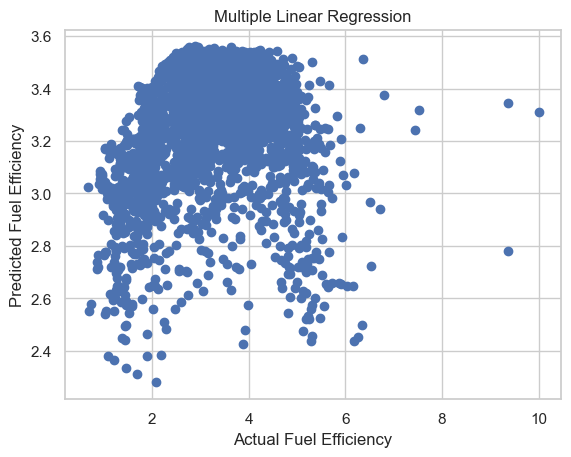

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)
print("R-squared score:", r2_score)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fuel Efficiency')
plt.ylabel('Predicted Fuel Efficiency')
plt.title('Multiple Linear Regression')
plt.show()